In [1]:
# Importações
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:

# --- Função para avaliação ---
def avaliar_modelo(nome, y_true, y_pred, y_prob):
    print(f"\n🔍 {nome}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC:", roc_auc_score(y_true, y_prob))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


def plot_matriz_confusao(y_true, y_pred, nome):
    cm = confusion_matrix(y_true, y_pred)
    cm_sum = np.sum(cm)
    cm_perc = cm / cm_sum * 100
    
    # Criar labels com valor absoluto e percentual
    labels = np.array([f"{v}\n{p:.1f}%" for v, p in zip(cm.flatten(), cm_perc.flatten())])
    labels = labels.reshape(cm.shape)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()

def plot_distribuicao_probabilidades(nome,y_prob):
    plt.figure(figsize=(10, 6))
    sns.histplot(y_prob, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribuição das probabilidades previstas para a classe 1  - {nome}")
    plt.xlabel("Probabilidade prevista (predict_proba)")
    plt.ylabel("Frequência")
    plt.axvline(0.5, color='red', linestyle='--', label='Threshold 0.5')
    plt.legend()
    plt.grid(True)
    plt.show()

def avaliar_threshold(y_true, y_prob, threshold=0.5):
    y_pred_thresh = (y_prob >= threshold).astype(int)
    
    print(f"\n🔧 Threshold = {threshold:.2f}")
    print("Precision:", precision_score(y_true, y_pred_thresh))
    print("Recall:", recall_score(y_true, y_pred_thresh))
    print("F1 Score:", f1_score(y_true, y_pred_thresh))
    print("AUC:", roc_auc_score(y_true, y_prob))

    plot_matriz_confusao(y_true, y_pred_thresh, f'Threshold {threshold:.2f}')
    

In [3]:
# Carregar e preparar dados
df_processed = pd.read_csv('C:/Users/Marcelo Almeida/Documents/TRABALHO DE CONCLUSÃO DE CURSO/projeto-tcc/data/processed/aneel_processed.csv', encoding='utf-8-sig')

X = df_processed.drop(columns=['rechamou_30min'])
y = df_processed['rechamou_30min']


In [4]:
#Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Treinar modelos
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_seed=42,thread_count=-1)
    # 'XGBoost': XGBClassifier(n_jobs=-1, random_state=42)  # Descomente se quiser usar XGBoost
}


Treinando Random Forest:2025-07-15 18:05:08
Tempo de treinamento do modelo Random Forest: 0:11:40.916957
Resultados do modelo Random Forest:

🔍 Random Forest
Accuracy: 0.7022642267385852
Precision: 0.6982007807894198
Recall: 0.6878592642268634
F1 Score: 0.6929914430233646
AUC: 0.7702570944382219

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71    524580
           1       0.70      0.69      0.69    501024

    accuracy                           0.70   1025604
   macro avg       0.70      0.70      0.70   1025604
weighted avg       0.70      0.70      0.70   1025604



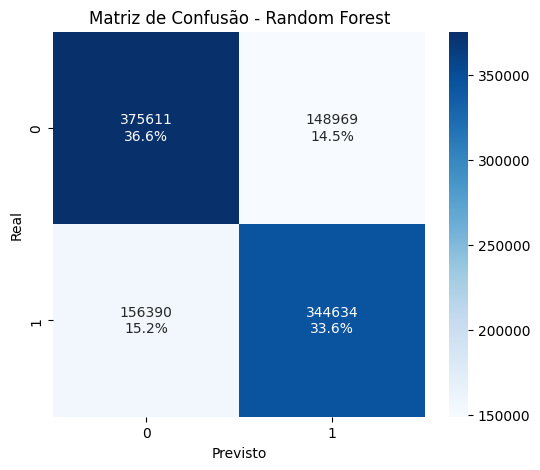

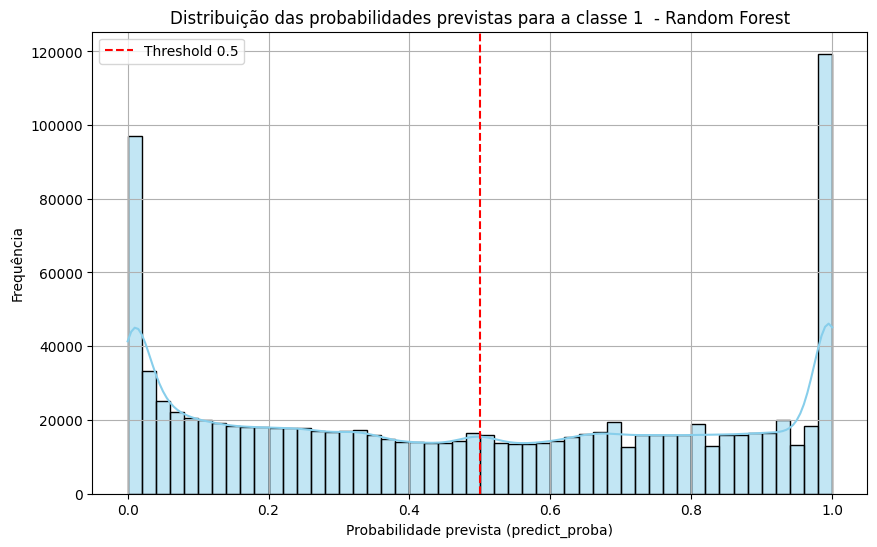

----------------------------------------------------------------------------
Treinando LightGBM:2025-07-15 18:17:03
[LightGBM] [Info] Number of positive: 2000608, number of negative: 2101807
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.190483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 4102415, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487666 -> initscore=-0.049346
[LightGBM] [Info] Start training from score -0.049346
Tempo de treinamento do modelo LightGBM: 0:00:47.487330
Resultados do modelo LightGBM:

🔍 LightGBM
Accuracy: 0.7491994961018092
Precision: 0.7601964584542877
Recall: 0.7108421951842626
F1 Score: 0.7346913936793464
AUC: 0.8242430604147183

Classification Report:
               precision    recall  f1-score   support

    

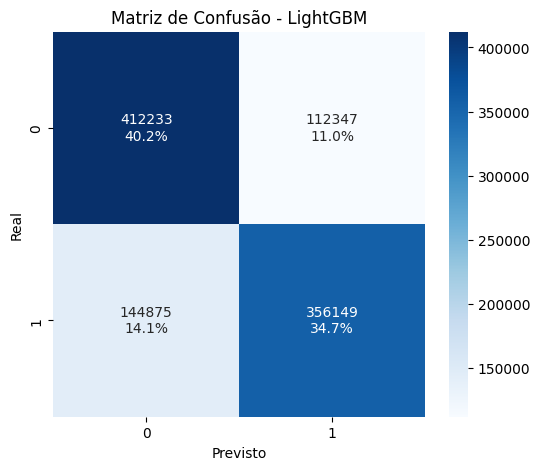

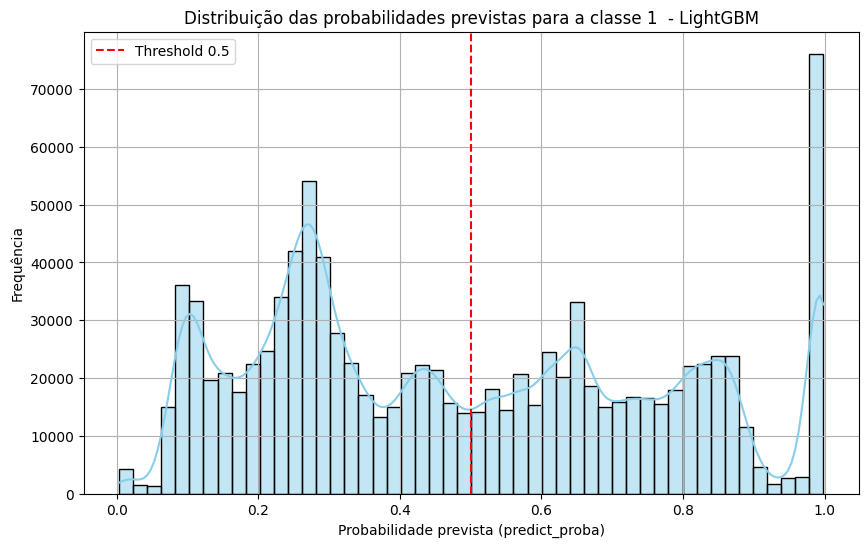

----------------------------------------------------------------------------
Treinando CatBoost:2025-07-15 18:18:01
Tempo de treinamento do modelo CatBoost: 0:45:58.435057
Resultados do modelo CatBoost:

🔍 CatBoost
Accuracy: 0.7504026895370923
Precision: 0.7606710495521372
Recall: 0.7135845787826531
F1 Score: 0.7363758632550457
AUC: 0.8259981655875983

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76    524580
           1       0.76      0.71      0.74    501024

    accuracy                           0.75   1025604
   macro avg       0.75      0.75      0.75   1025604
weighted avg       0.75      0.75      0.75   1025604



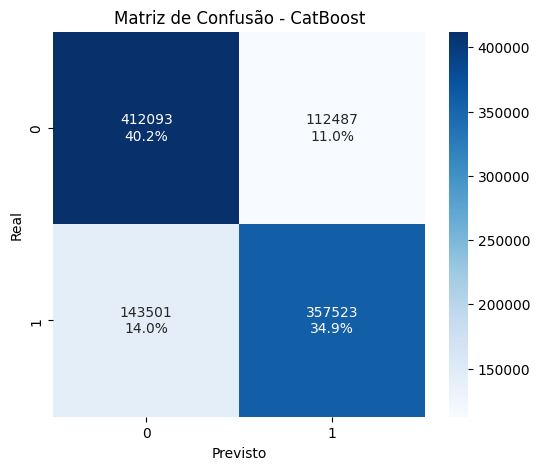

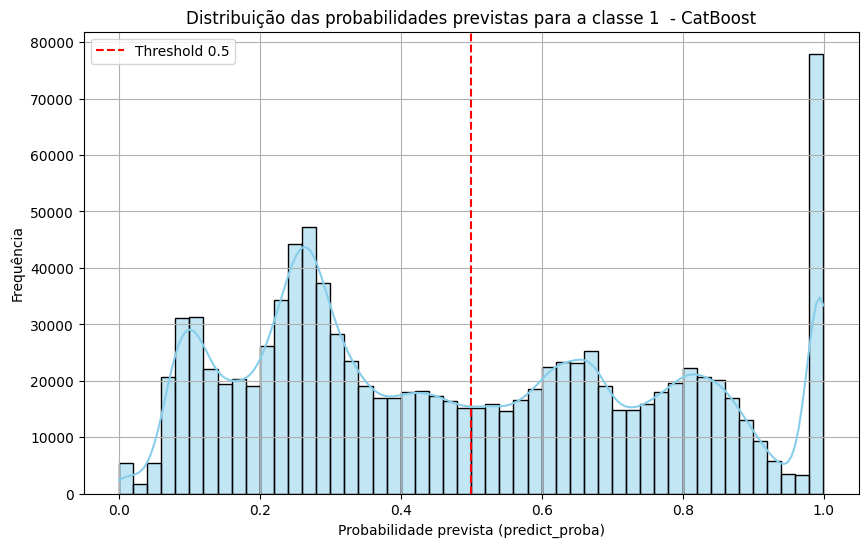

----------------------------------------------------------------------------


In [6]:
resultados = []

for nome, modelo in modelos.items():
    inicio_treino = dt.datetime.now()
    print(f"Treinando {nome}:{inicio_treino.strftime("%Y-%m-%d %H:%M:%S")}")
    cat_features = ['distribuidora_codificado', 'operacao_codificado', 'skill_codificado']
    if nome == 'CatBoost':
        modelo.fit(X_train, y_train, cat_features=cat_features)
    else:
        modelo.fit(X_train, y_train)
        
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]

    # tempo de treinamento
    fim_treino = dt.datetime.now()
    tempo_treino = fim_treino - inicio_treino
    print(f"Tempo de treinamento do modelo {nome}: {tempo_treino}")
    print(f"Resultados do modelo {nome}:")
    avaliar_modelo(nome, y_test, y_pred, y_prob)
    plot_matriz_confusao(y_test, y_pred, nome)
    plot_distribuicao_probabilidades(nome,y_prob)

    print(f"----------------------------------------------------------------------------")

    resultados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })




🔧 Threshold = 0.50
Precision: 0.7606710495521372
Recall: 0.7135845787826531
F1 Score: 0.7363758632550457
AUC: 0.8259981655875983


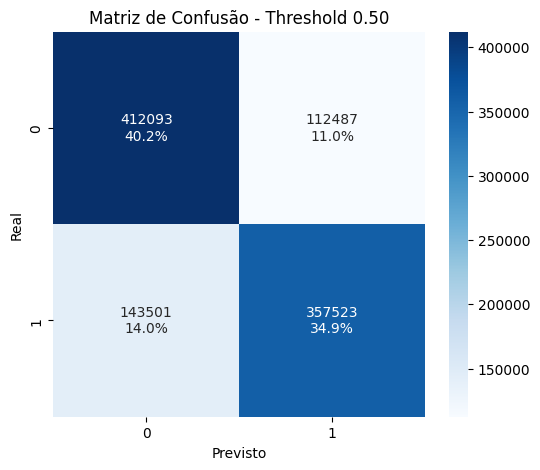

In [14]:
avaliar_threshold(y_test, y_prob, threshold=0.5)
#plot_matriz_confusao2(y_test, y_pred, 'catboost')


--- Comparação geral dos modelos ---


,Modelo,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.702264,0.698201,0.687859,0.692991,0.770257
1,LightGBM,0.749199,0.760196,0.710842,0.734691,0.824243
2,CatBoost,0.750403,0.760671,0.713585,0.736376,0.825998


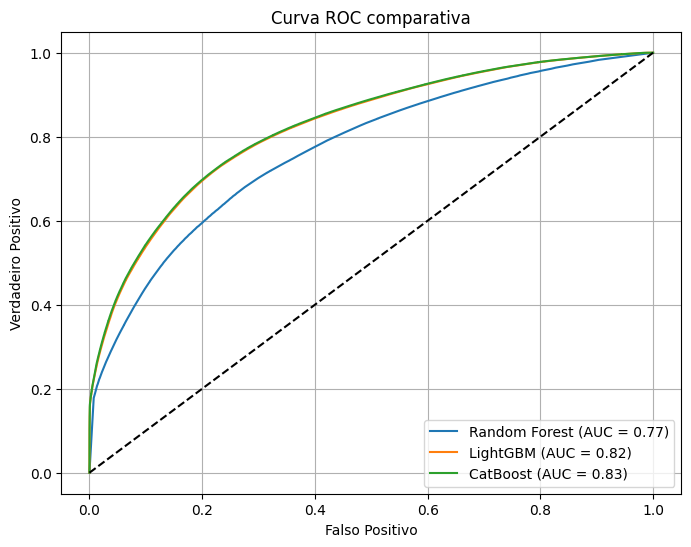

In [8]:
#Comparar resultados em tabela
df_resultados = pd.DataFrame(resultados)
print("\n--- Comparação geral dos modelos ---")
display(df_resultados)

# 06 - Plotar curva ROC comparativa
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for nome, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC comparativa')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [9]:
# Cria um DataFrame para facilitar a análise
df_result = pd.DataFrame({
    'y_prob': y_prob,
    'y_true': y_test
})

# Filtra os exemplos com alta confiança
df_confident = df_result[df_result['y_prob'] > 0.95]

In [10]:
# Alinha os dados de entrada com os índices confiantes
X_confident = X_test.loc[df_confident.index]

# Junta todas as colunas (features + y_true + y_prob)
df_confident_full = pd.concat([X_confident, df_confident], axis=1)
df_confident_full

,distribuidora_codificado,duracao_fila,duracao_atendimento,operacao_codificado,skill_codificado,short_call_30s,hora,flag_pesquisa,y_prob,y_true
2978171,9,55,12,1,24,1,9,0,0.995328,1
3492625,9,774,12,1,24,1,13,0,0.989121,1
2458679,5,179,7,3,7,1,7,0,0.955781,1
3528389,9,27,12,1,27,1,16,0,0.996011,1
4136325,9,72,12,1,24,1,8,0,0.996227,1
...,...,...,...,...,...,...,...,...,...,...
34516,5,18,12,2,24,1,18,0,0.995599,1
568381,15,26,8,3,28,1,9,0,0.996271,1
345188,13,15,12,2,29,1,16,0,0.997125,1
2323740,1,15,8,1,46,1,10,0,0.997307,1


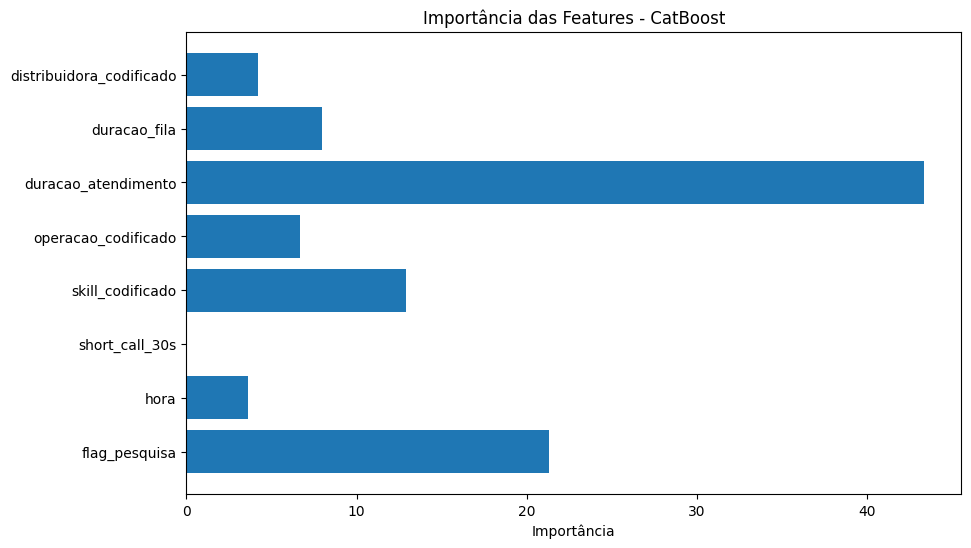

In [11]:
# Obter importâncias
importancias = modelo.get_feature_importance()
nomes_features = X_train.columns

# Plotar
plt.figure(figsize=(10,6))
plt.barh(nomes_features, importancias)
plt.xlabel("Importância")
plt.title("Importância das Features - CatBoost")
plt.gca().invert_yaxis()
plt.show()

c:\Users\Marcelo Almeida\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


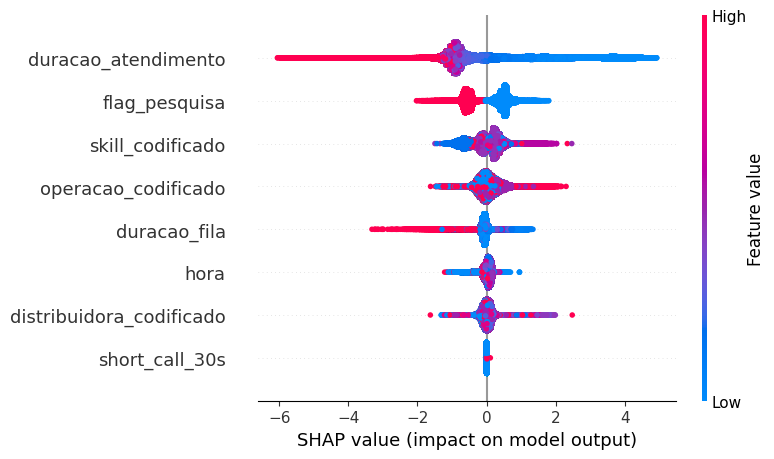

In [12]:
import shap

# Criar objeto explainer
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_test)

# Plotar explicação global
shap.summary_plot(shap_values, X_test)